In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test_ids = test['Id']

# Visualização dos dados de treino e teste
print("Train:")
display(train.head())

print("\nTeste:")
display(test.head())

# Dimensoes do DATASET
print(f'Train Shape: {train.shape}')
print(f'Test Shape: {test.shape}')

Train:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000



Teste:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Train Shape: (1460, 81)
Test Shape: (1459, 80)


In [74]:
# Verificando a distribuição dos valores nulos
missing_values_train = train.isnull().sum()
missing_values_train = missing_values_train[missing_values_train > 0].sort_values(ascending=False)
print("\nValores Nulos nas colunas do treino:")
display(missing_values_train)


missing_values_test = test.isnull().sum()
missing_values_test = missing_values_test[missing_values_test > 0].sort_values(ascending=False)
print("\nValores Nulos nas colunas do Teste:")
display(missing_values_test)



Valores Nulos nas colunas do treino:


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


Valores Nulos nas colunas do Teste:


PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
MasVnrType       894
FireplaceQu      730
LotFrontage      227
GarageQual        78
GarageCond        78
GarageYrBlt       78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrArea        15
MSZoning           4
Functional         2
BsmtFullBath       2
Utilities          2
BsmtHalfBath       2
Exterior1st        1
Exterior2nd        1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
KitchenQual        1
GarageArea         1
GarageCars         1
SaleType           1
dtype: int64

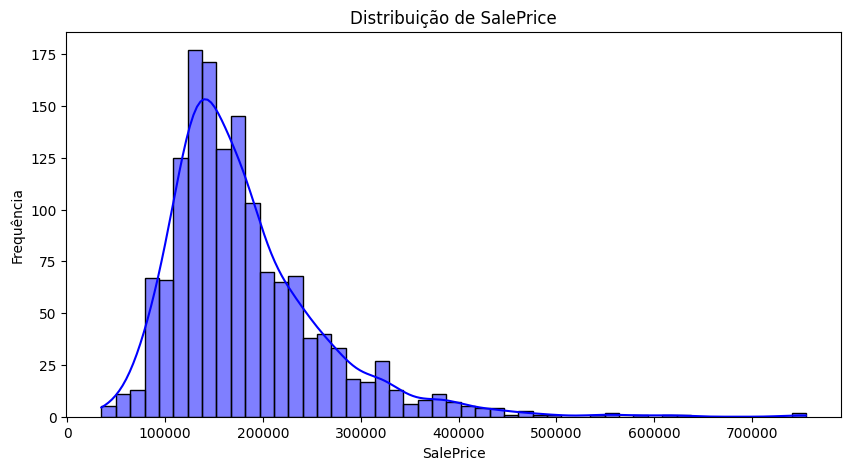

In [75]:
# Visualizando a distribuição da variavel alvo
plt.figure(figsize=(10, 5)) # Cria uma figura de 10cm LARGURA e 5cm ALTURA
sns.histplot(train['SalePrice'], kde=True, color='blue') # Criando um histograma do DF train, kde=True adiciona uma curva de densidade, a cor do histograma e AZUL
plt.title('Distribuição de SalePrice') # titulo do grafico
plt.xlabel('SalePrice') # titulo do eixo X
plt.ylabel('Frequência') # titulo do eixo Y
plt.show() # Exibe o gráfico na tela

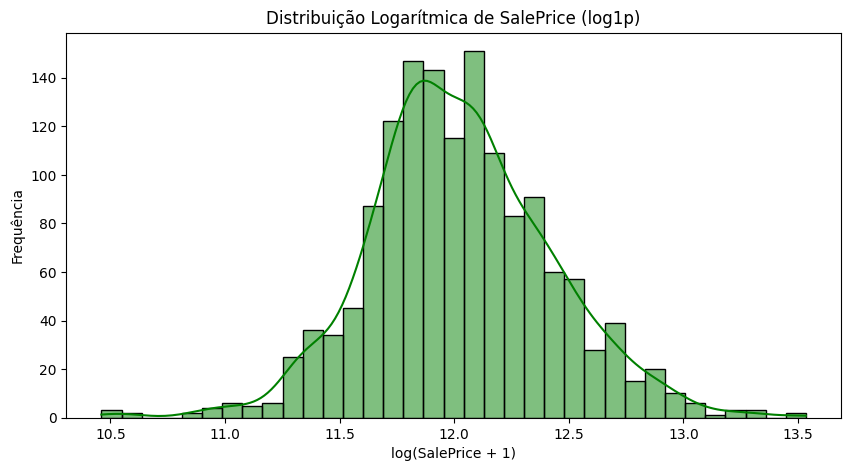

In [76]:
# visualização logarítmica de np.log1p
plt.figure(figsize=(10, 5))
sns.histplot(np.log1p(train['SalePrice']), kde=True, color='green')
plt.title('Distribuição Logarítmica de SalePrice (log1p)')
plt.xlabel('log(SalePrice + 1)')
plt.ylabel('Frequência')
plt.show()


In [77]:
# Correlação com a variavel alvo (apenas variaveis numericas)

# USADA PARA IDENTIFICAR QUAIS VARIAVEIS NUMERICAS TEM MAIOR IMPACTO NO VALOR DO IMOVEL

corr = train.corr(numeric_only=True) # Calcula a matriz de correlação entre todas as colunas numericas do DF train, e numeric_only=True ignora dados de texto e categorico
top_corr_features = corr['SalePrice'].sort_values(ascending=False).head(10) # 10 variaveis mais correlacionadas com SALEPRICE
print("\nTop 10 correlações com SalePrice:")
display(top_corr_features)


Top 10 correlações com SalePrice:


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

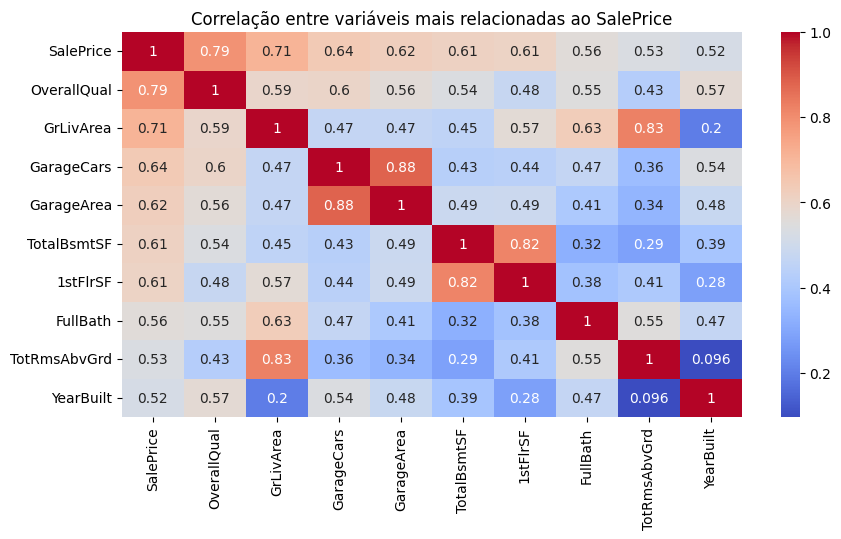

In [78]:
# HEATMAP com as correlações mais fortes
plt.figure(figsize=(10, 5))
sns.heatmap(train[top_corr_features.index].corr(), annot=True, cmap='coolwarm') # top_corr_features.index retorna nomes de variaveis selecionadas e pega apenas as colunas, annot=True escreve os valores de correlação no heatmap, cmap descreve os esquemas de cores do mapa
plt.title('Correlação entre variáveis mais relacionadas ao SalePrice')
plt.show()

In [79]:
# PREENCHIMENTO DE VALORES AUSENTES
# Variaveis Numericas: usamos a mediana (para enviar influência de outliers)

numerical_cols = train.select_dtypes(include=[np.number]).columns.drop('SalePrice') #Seleciona os dados numericos e cria arrays, e ele retira a coluna saleprice porque nao existe essa tabela no DF test
for col in numerical_cols:
    median_values = train[col].median() # Preenche os valores ausentes (NaN) tanto em train quanto em test com essa mediana
    train[col].fillna(median_values, inplace=True)
    test[col].fillna(median_values, inplace=True)

# Variaveis Categoricas: usamos o modo (valor mais frequente)

categorical_values = train.select_dtypes(include='object').columns
for col in categorical_values:
    mode_value = train[col].mode()[0] # Pegamos o valor mais frequente(moda) no DF train e inserimos nas colunas
    train[col].fillna(mode_value, inplace=True)
    if col in test.columns:
        test[col].fillna(mode_value, inplace=True)

C:\Users\nimgu\AppData\Local\Temp\ipykernel_17224\744251600.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(median_values, inplace=True)
C:\Users\nimgu\AppData\Local\Temp\ipykernel_17224\744251600.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [80]:
# Utilzando o ONE-HOT Encoding para variaveis categoricas

# Aplica **One-Hot Encoding** para converter variáveis categóricas em variáveis numéricas binárias (0 ou 1).
# - `drop_first=True`: remove a primeira categoria de cada coluna para evitar multicolinearidade 
# (problemas em modelos lineares por causa de variáveis redundantes).

train = pd.get_dummies(train, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

In [81]:
# ➡️ Garante que train e test tenham as mesmas colunas, alinhadas pelo nome:
# e mantem todas as colunas de train, mesmo que nao existam em TEST
# 📌 Isso resolve problemas causados por diferenças nas categorias entre train e test.

train, test = train.align(test, join='left', axis=1)

In [82]:
print(f"Shape do train após o pré-processamento: {train.shape}")
print(f"Shape do test após o pré-processamento: {test.shape}")

Shape do train após o pré-processamento: (1460, 246)
Shape do test após o pré-processamento: (1459, 246)


In [83]:
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Separando X e Y
X = train.drop('SalePrice', axis=1)
y = np.log1p(train['SalePrice'])


In [84]:
# Train/Valid split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=42)



In [85]:
# Normalização
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [86]:
# Modelos
models = {
    "Linear Regression ": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=100, learning_rate=0.05, random_state=42)
}

In [87]:
# Avaliação
for name, model in models.items(): # Pega os items 'nome' e o 'Modelo' da Pipeline MODELS
    model.fit(X_train_scaled, y_train) #AJUSTA OS MODELOS
    preds = model.predict(X_val_scaled) #FAZ A PREDIÇÃO COM OS DADOS DE VALIDAÇÃO
    rmse = np.sqrt(mean_squared_error(y_val, preds)) #Calcula o erro quadrático médio (MSE), que é a média dos quadrados das diferenças entre os valores reais (y_val) e os previstos (preds).
    print(f'{name} RMSE (log): {rmse:.4f}') # np.srqt - Tira a raiz quadrada do MSE, resultando no RMSE (Root Mean Squared Error), que é uma métrica de erro mais intuitiva, pois tem a mesma unidade dos valores originais.

    #O menor RMSE indica o modelo mais promissor para gerar as previsões finais.



Linear Regression  RMSE (log): 0.2131


Random Forest RMSE (log): 0.1477
XGBoost RMSE (log): 0.1468


In [88]:
# Separando X e Y corretamente
X_full = train.loc[:, train.columns != 'SalePrice']
y_full = np.log1p(train['SalePrice'])

In [89]:
# Alinhamento com o test
X_full, X_test = X_full.align(test, join='left', axis=1, fill_value=0)

In [90]:
# Normalização
scaler = StandardScaler()
X_full_scaled = scaler.fit_transform(X_full)
X_test_scaled = scaler.transform(X_test)

In [91]:
# Treinamento e predição
final_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.05, random_state=42)
final_model.fit(X_full_scaled, y_full)
test_preds_log = final_model.predict(X_test_scaled)
test_preds = np.expm1(test_preds_log)

submission = pd.DataFrame({
    'Id': test_ids,
    'SalePrice': test_preds
})
submission.to_csv('submission.csv', index=False)
print("Submissão Salva como 'submission.csv' ✅")

Submissão Salva como 'submission.csv' ✅


In [92]:
# Ver as 10 casas mais caras
top10 = train.sort_values(by='SalePrice', ascending=False).head(10)
top10[['Id', 'SalePrice']]

,Id,SalePrice
691,692,755000
1182,1183,745000
1169,1170,625000
898,899,611657
803,804,582933
1046,1047,556581
440,441,555000
769,770,538000
178,179,501837
798,799,485000


In [93]:
# Verificando as casas mais caras no DATASET
variaveis_importantes = ['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'FullBath', 'Fireplaces']


print('==== MÉDIA DAS 10 CASAS MAIS CARAS ====')
print(top10[variaveis_importantes].describe().loc['mean'])

print('\n==== MÉDIA GERAL ====')
print(train[variaveis_importantes].describe().loc['mean'])




==== MÉDIA DAS 10 CASAS MAIS CARAS ====
OverallQual       9.3
GrLivArea      3152.8
GarageArea      850.7
TotalBsmtSF    2171.2
YearBuilt      2003.4
FullBath          2.7
Fireplaces        1.5
Name: mean, dtype: float64

==== MÉDIA GERAL ====
OverallQual       6.099315
GrLivArea      1515.463699
GarageArea      472.980137
TotalBsmtSF    1057.429452
YearBuilt      1971.267808
FullBath          1.565068
Fireplaces        0.613014
Name: mean, dtype: float64
